# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data loading

In [2]:
delhidf = pd.read_csv('Delhi_data.csv')
delhidf.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor


# EDA

In [3]:
delhidf.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type'],
      dtype='object')

In [4]:
delhidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 98.5+ KB


In [5]:
delhidf.describe()

,Area,BHK,Bathroom,Parking,Price
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08


In [6]:
delhidf.shape

(1259, 10)

In [7]:
delhidf.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
dtype: object

In [8]:
delhidf.isnull().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
dtype: int64

In [9]:
delhidf2 = delhidf.dropna()
delhidf2.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
dtype: int64

In [10]:
delhidf2["Price"].value_counts()

15000000    30
30000000    21
20000000    20
25000000    20
7000000     19
            ..
1950000      1
28900000     1
21900000     1
8910000      1
22200000     1
Name: Price, Length: 279, dtype: int64

In [11]:
delhidf2['BHK'].unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10], dtype=int64)

In [12]:
delhidf2['Area'].unique()

array([  800.    ,   750.    ,   950.    ,   600.    ,   650.    ,
        1300.    ,  1350.    ,   985.    ,  1100.    ,   870.    ,
         630.    ,   660.    ,   344.4448,   550.    ,  1150.    ,
         850.    ,   900.    ,   430.556 ,   914.9315,   500.    ,
          28.    ,  2160.    ,  1080.    ,  1450.    ,   810.    ,
        1710.    ,  1650.    ,  1280.    ,  1260.    ,  1130.    ,
        1500.    ,  1000.    ,  2925.    ,  1600.    ,  1143.    ,
        8000.    ,   890.    ,  1387.    ,  1050.    ,  1200.    ,
         700.    ,  1700.    ,  1550.    ,  1400.    ,  1900.    ,
        1850.    ,  1800.    ,  1620.    ,  1540.    ,  2300.    ,
        1560.    ,   400.    ,  1525.    ,  2200.    ,  2880.    ,
        2700.    ,  1575.    ,  1675.    ,   825.    ,   875.    ,
         450.    ,   100.    ,    75.    ,   270.    ,   444.    ,
         729.    ,  4050.    ,  2400.    ,   405.    ,   666.    ,
        1360.    ,  2170.    ,   720.    ,  1030.    ,   350. 

In [13]:
delhidf3 =delhidf2.copy()
delhidf3['Pr_per_sqft'] = delhidf2['Price']/delhidf2['Area']
delhidf3.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Pr_per_sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,9538.461538


In [14]:
delhidf3.Locality = delhidf3.Locality.apply(lambda x : x.strip())
loc_count = delhidf3.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False)
loc_count

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       33
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                         

In [15]:
loc_less_than_10 =loc_count[loc_count<10]
loc_less_than_10

Locality
DDA Lig Flats, Narela                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                9
Narela                                                                                                                                                                                                                                                                                                                                                  

In [16]:
delhidf3.Locality = delhidf3.Locality.apply(lambda x: 'Other' if x in loc_less_than_10 else x)
len(delhidf3['Locality'].unique())

33

In [17]:
delhidf3.groupby('Locality')['Locality'].agg('count').sort_values(ascending=True)

Locality
Rohini Sector 24                                                 10
Vasant Kunj                                                      10
Mahavir Enclave                                                  10
The Leela Sky Villas, Patel Nagar                                10
Narmada Apartment, Alaknanda                                     10
Vasundhara Enclave                                               11
New Manglapuri, Sultanpur                                        11
Hauz Khas                                                        11
Malviya Nagar                                                    12
Sukhdev Vihar, Okhla                                             12
New Moti Nagar, Kirti Nagar                                      14
DLF Capital Greens, New Moti Nagar, Kirti Nagar                  14
New Friends Colony                                               14
Patel Nagar West                                                 15
Mahavir Enclave Part 1                 

Text(0, 0.5, 'Count')

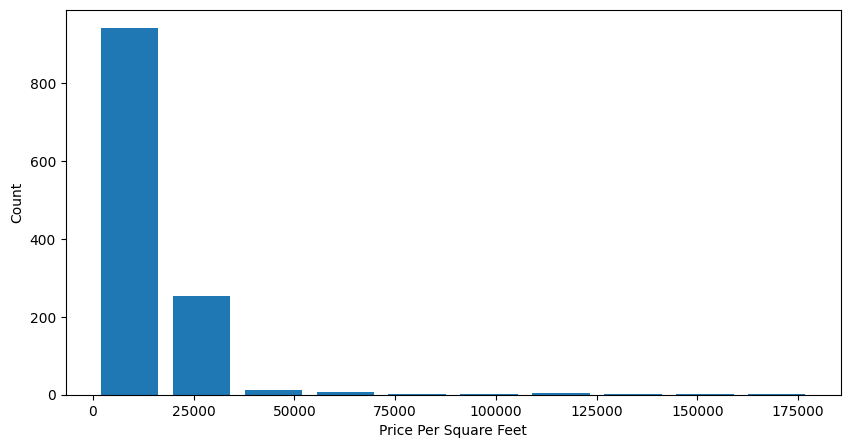

In [18]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(delhidf3.Pr_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

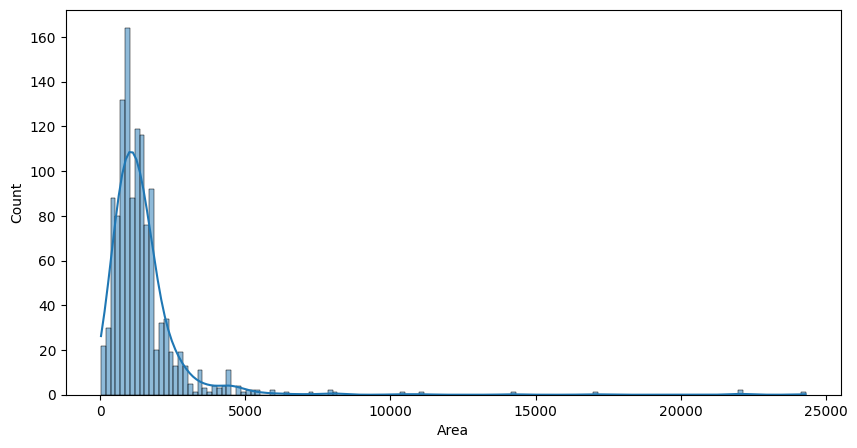

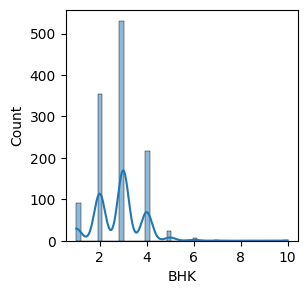

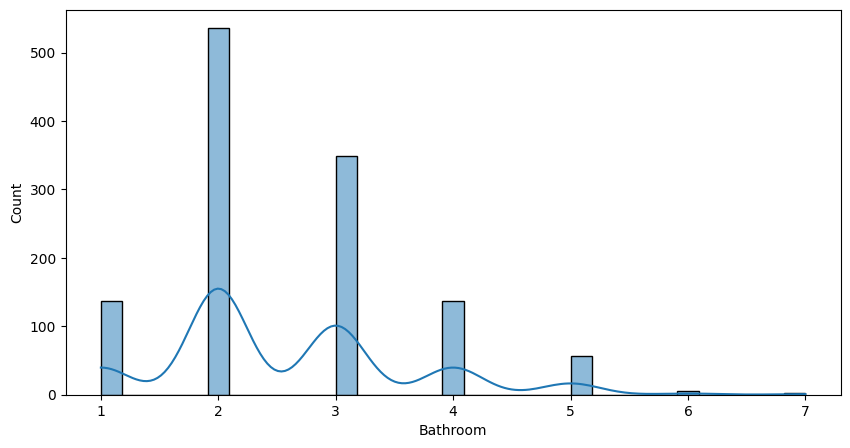

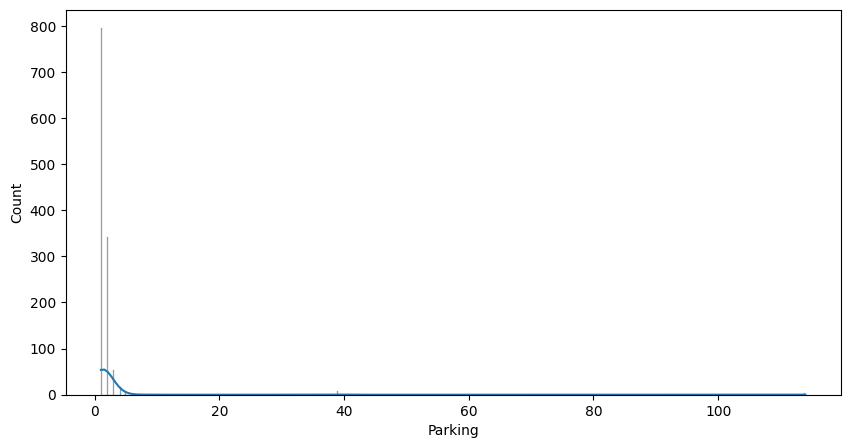

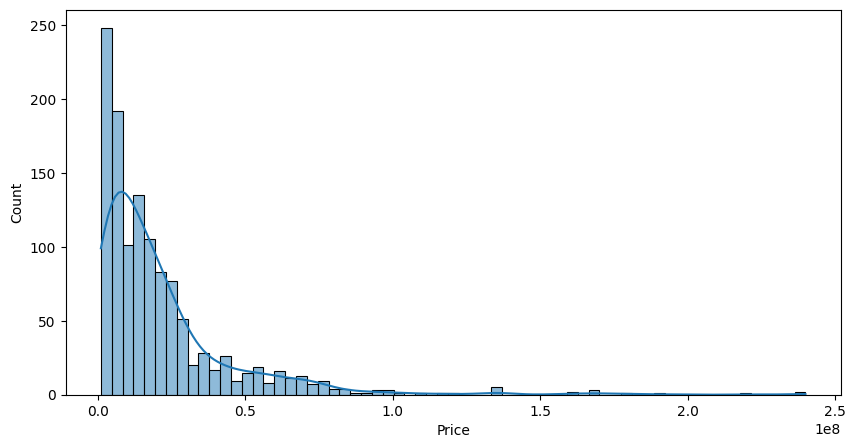

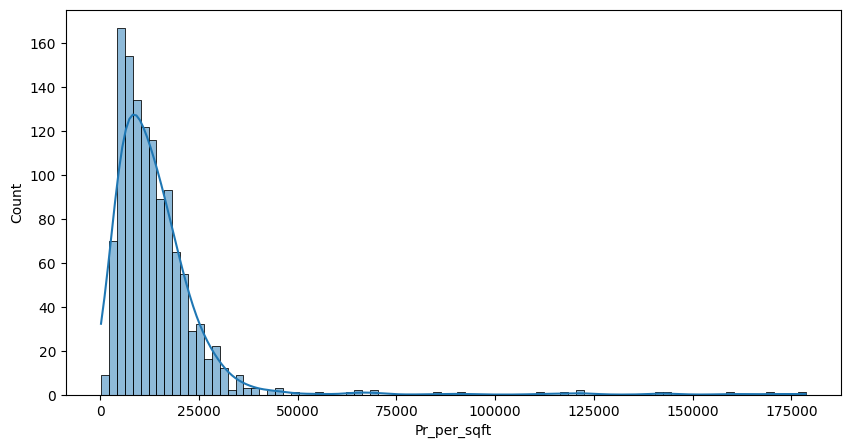

In [19]:
plt.figure(figsize=(3,3))

for index, i in enumerate(delhidf3.columns):
        if(delhidf3[i].dtype == np.float64 or delhidf3[i].dtype == np.int64):
              plt.figure(index)
              sns.histplot(delhidf3[i],kde=True)            
plt.show()

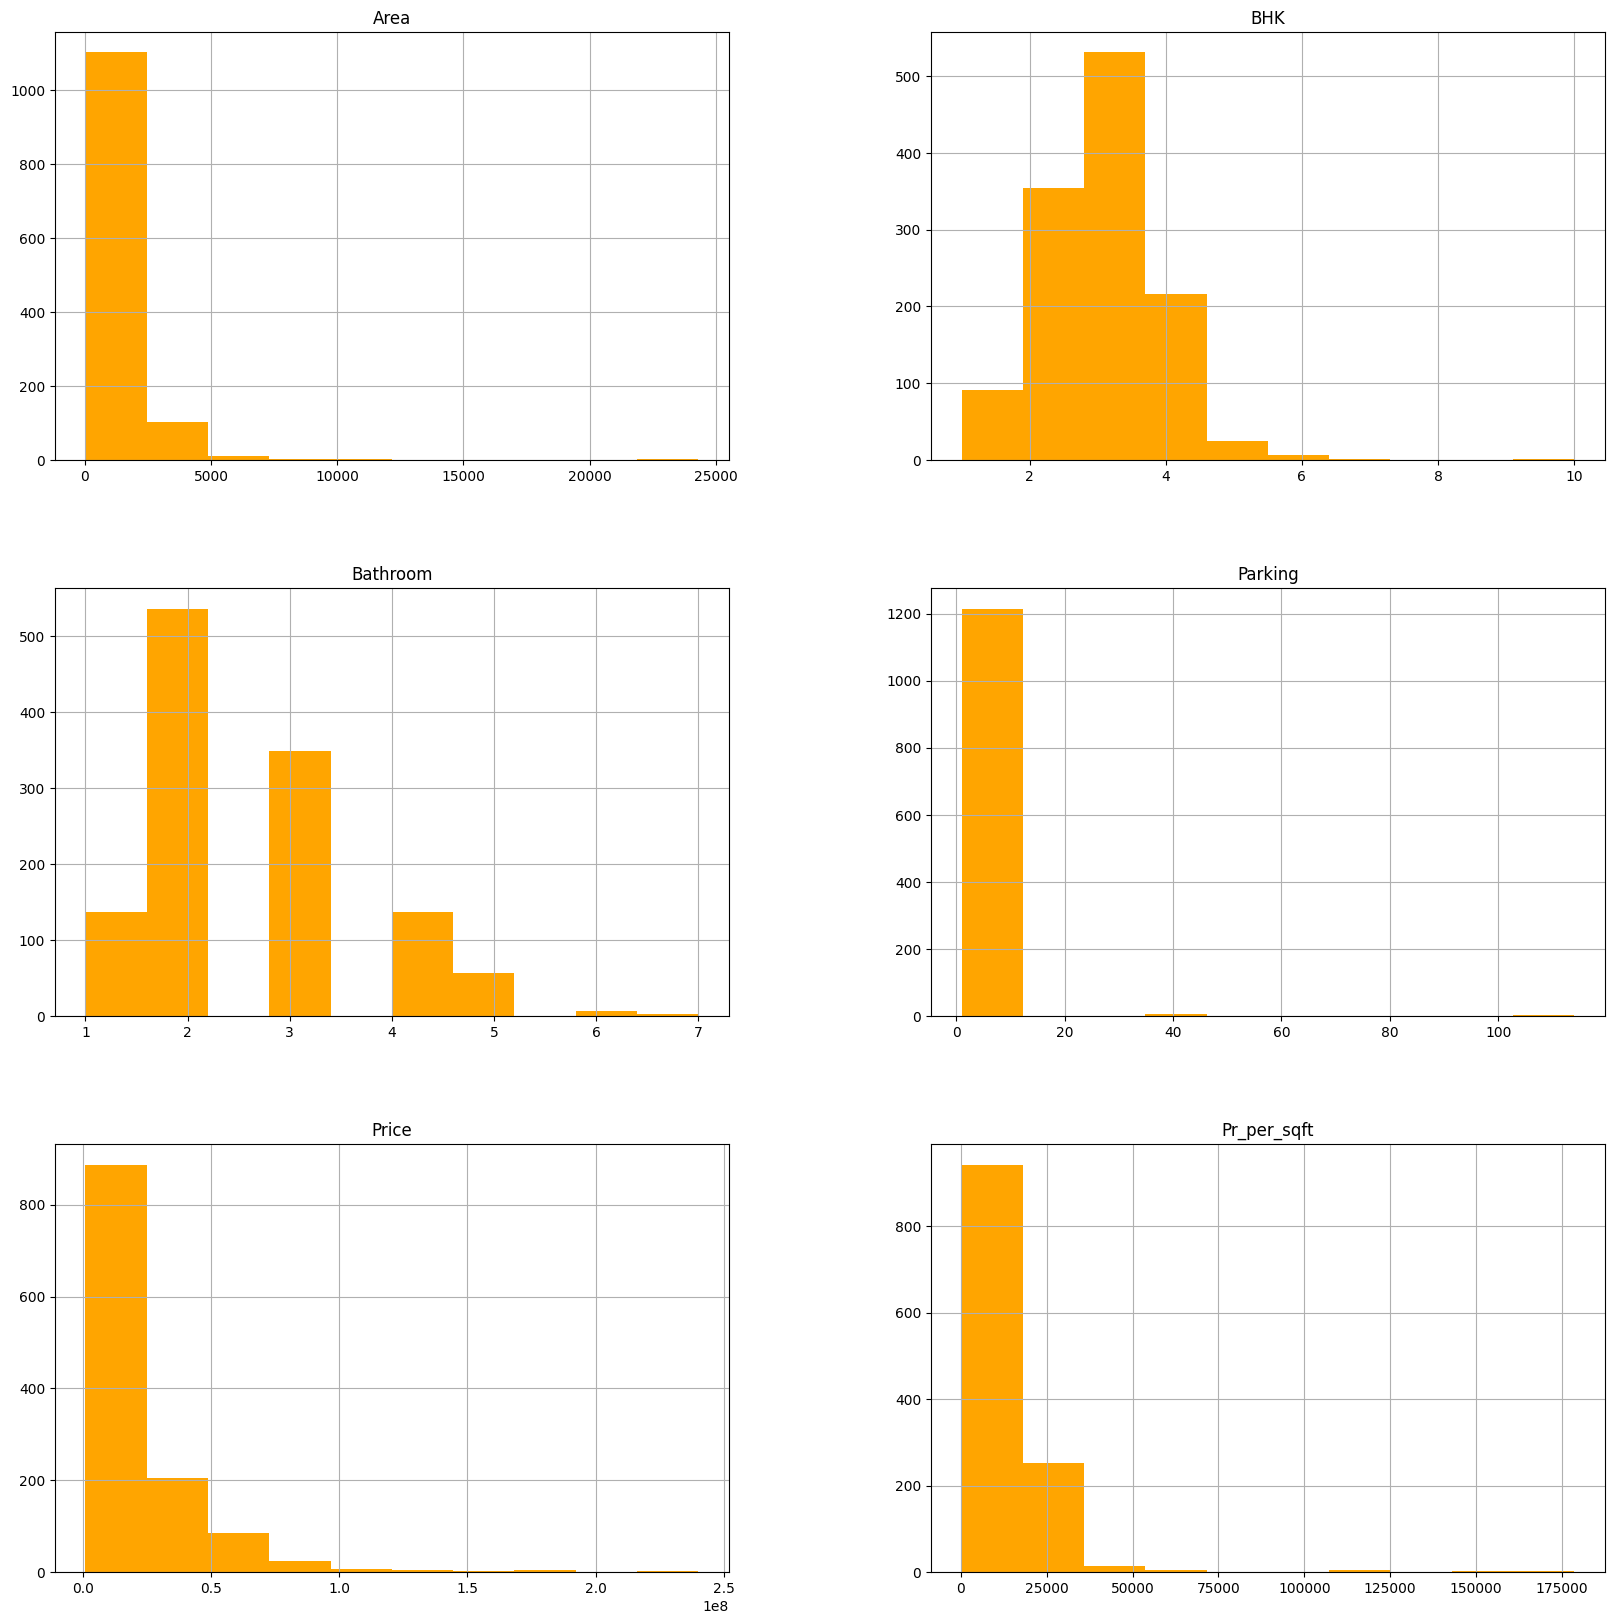

In [20]:
delhidf3.hist(color='Orange',figsize=(20,20))
plt.show()

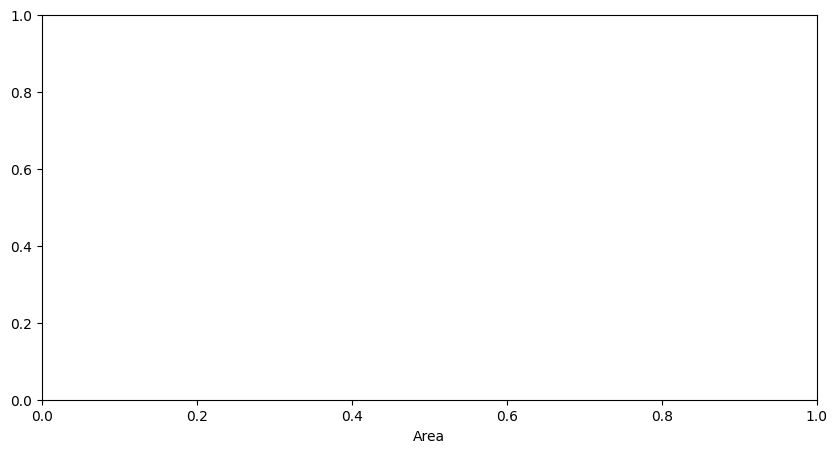

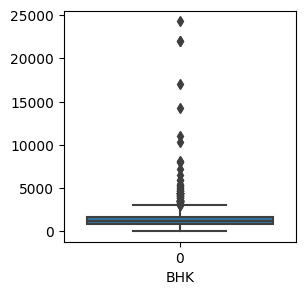

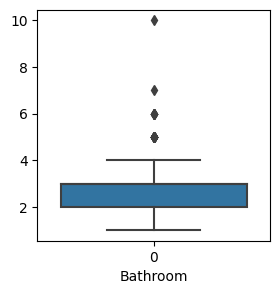

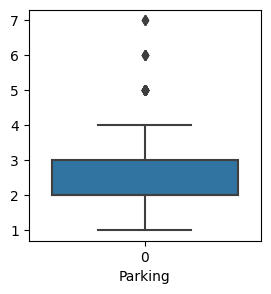

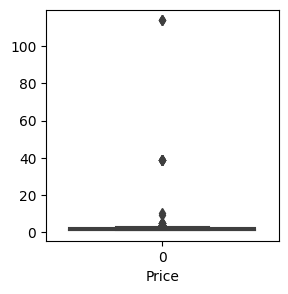

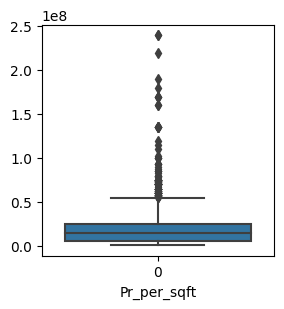

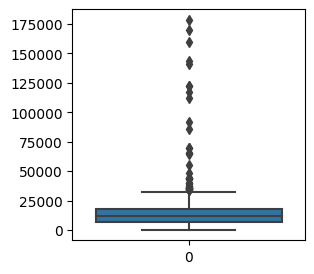

In [21]:
for index, i in enumerate(delhidf3.columns):
        if(delhidf3[i].dtype == np.float64 or delhidf3[i].dtype == np.int64):
              plt.xlabel(i)
              plt.figure(figsize=(3,3))
              sns.boxplot(delhidf3[i])
plt.show()

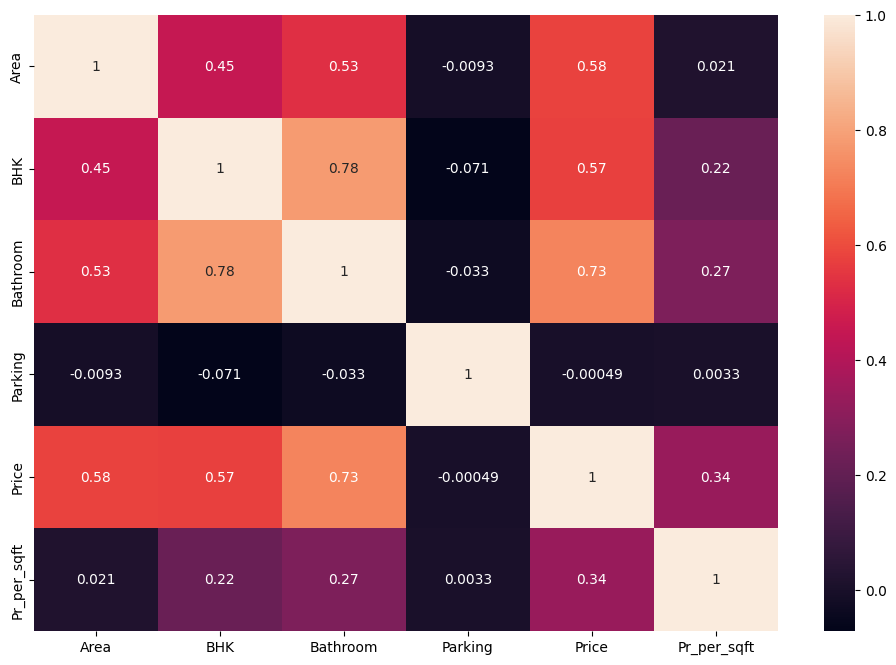

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data=delhidf3.corr(),annot=True)
plt.show()

In [23]:
delhidf3.corr()

,Area,BHK,Bathroom,Parking,Price,Pr_per_sqft
Area,1.000000,0.451383,0.534027,-0.009295,0.579487,0.020940
BHK,0.451383,1.000000,0.781020,-0.070683,0.574266,0.219486
Bathroom,0.534027,0.781020,1.000000,-0.032867,0.727533,0.270838
Parking,-0.009295,-0.070683,-0.032867,1.000000,-0.000486,0.003335
Price,0.579487,0.574266,0.727533,-0.000486,1.000000,0.337097
Pr_per_sqft,0.020940,0.219486,0.270838,0.003335,0.337097,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'J R Designers Floors, Rohini Sector 24'),
  Text(2, 0, 'Rohini Sector 24'),
  Text(3, 0, 'Lajpat Nagar 3'),
  Text(4, 0, 'Lajpat Nagar 2'),
  Text(5, 0, 'The Leela Sky Villas, Patel Nagar'),
  Text(6, 0, 'The Amaryllis, Karol Bagh'),
  Text(7, 0, 'Vasant Kunj'),
  Text(8, 0, 'New Friends Colony'),
  Text(9, 0, 'Kailash Colony, Greater Kailash'),
  Text(10, 0, 'Yamuna Vihar, Shahdara'),
  Text(11, 0, 'Laxmi Nagar'),
  Text(12, 0, 'Patel Nagar West'),
  Text(13, 0, 'Sukhdev Vihar, Okhla'),
  Text(14, 0, 'Saket'),
  Text(15, 0, 'Safdarjung Enclave'),
  Text(16, 0, 'Common Wealth Games Village, Commonwealth Games Village 2010'),
  Text(17, 0, 'Narmada Apartment, Alaknanda'),
  Text(18, 0, 'Alaknanda'),
  Text(19, 0, 'DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road'),
  Text(20, 0, 'New Manglapuri, Sulta

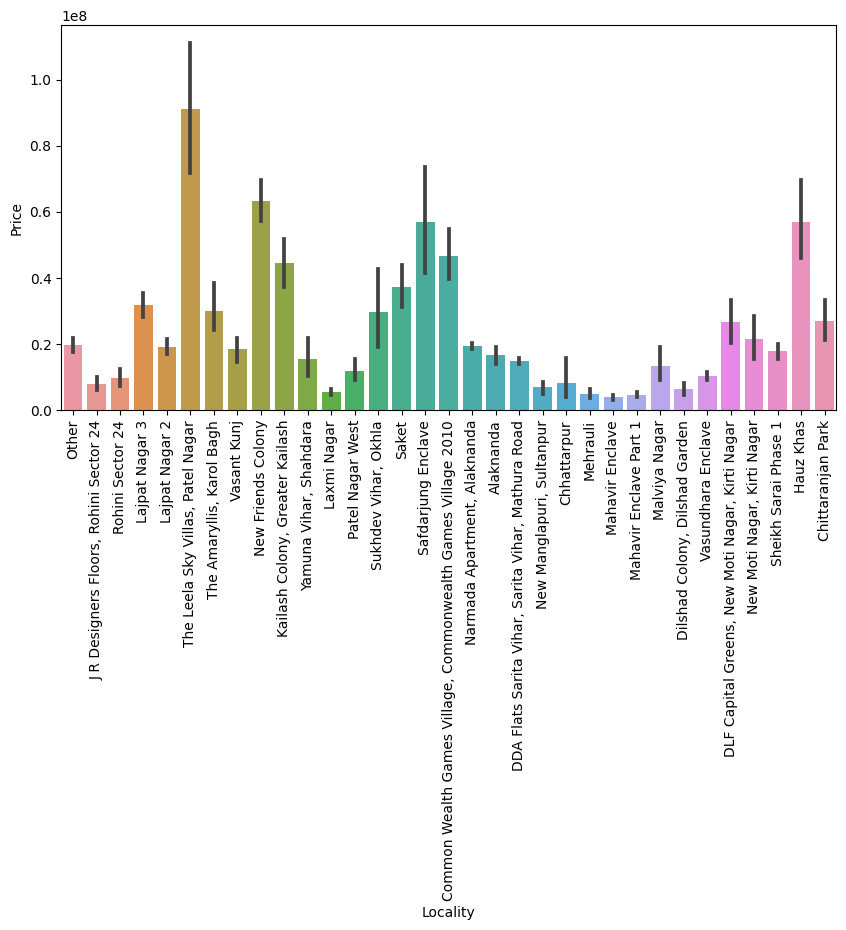

In [24]:
sns.barplot(x='Locality', y='Price',data=delhidf3)
plt.xticks(rotation=90)

#bar plot

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in delhidf3.columns:
    if delhidf3[col].dtypes == 'object':
        delhidf3[col] = le.fit_transform(delhidf3[col])

In [26]:
delhidf3.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Pr_per_sqft
0,800.0,3,2.0,1,21,1.0,6500000,1,0,1,8125.000000
1,750.0,2,2.0,1,8,1.0,5000000,1,0,0,6666.666667
2,950.0,2,2.0,0,21,1.0,15500000,1,1,0,16315.789474
3,600.0,2,2.0,1,23,1.0,4200000,1,1,1,7000.000000
4,650.0,2,2.0,1,21,1.0,6200000,1,0,1,9538.461538


In [27]:
x=delhidf3.drop(['Price'],axis=1)
y=delhidf3['Price']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x_train

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Pr_per_sqft
1231,1600.0,3,3.0,1,2,2.0,1,0,1,20937.500000
1172,1260.0,3,3.0,1,21,2.0,1,1,1,13095.238095
398,450.0,2,1.0,1,21,1.0,1,0,1,4111.111111
700,1600.0,3,3.0,1,17,2.0,1,1,0,12500.000000
702,1400.0,3,2.0,2,0,1.0,1,1,0,13571.428571
...,...,...,...,...,...,...,...,...,...,...
755,1200.0,2,2.0,1,21,1.0,1,1,0,8333.333333
1213,3600.0,4,4.0,1,21,2.0,0,0,1,18055.555556
1179,1800.0,3,3.0,1,21,2.0,1,1,1,7777.777778
544,1450.0,3,3.0,1,21,1.0,0,0,1,23448.275862


In [30]:
x_test

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Pr_per_sqft
1206,2050.0,3,3.0,1,21,2.0,1,0,1,34634.146341
896,50.0,1,1.0,1,21,1.0,1,0,0,70000.000000
1188,900.0,3,3.0,1,21,1.0,1,0,1,7555.555556
142,875.0,2,2.0,2,10,1.0,1,0,1,17142.857143
32,900.0,2,2.0,2,21,1.0,1,0,1,11666.666667
...,...,...,...,...,...,...,...,...,...,...
311,750.0,2,2.0,2,21,1.0,1,1,1,6000.000000
176,2300.0,4,4.0,1,21,1.0,1,0,1,8695.652174
1018,2000.0,4,4.0,1,27,1.0,1,1,1,13750.000000
124,1500.0,3,3.0,1,10,2.0,1,0,1,17333.333333


In [31]:
y_train

1231    33500000
1172    16500000
398      1850000
700     20000000
702     19000000
          ...   
755     10000000
1213    65000000
1179    14000000
544     34000000
1181    30000000
Name: Price, Length: 980, dtype: int64

In [32]:
y_test

1206    71000000
896      3500000
1188     6800000
142     15000000
32      10500000
          ...   
311      4500000
176     20000000
1018    27500000
124     26000000
997     24900000
Name: Price, Length: 245, dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)

LinearRegression()

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

a=cross_val_score(LinearRegression(), x, y, cv=cv)


In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

b=cross_val_score(RandomForestRegressor(), x, y, cv=cv)


In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

c=cross_val_score(KNeighborsRegressor(), x, y, cv=cv)

In [39]:
result=rf.predict(np.array([[2050.0,3,3.0,1,21,2.0,1,0,1,34634.146341]]))
result

array([66250000.])

In [40]:
a

array([0.57957487, 0.64531031, 0.67192723, 0.59759432, 0.62375997])

In [41]:
b

array([0.99040039, 0.97683339, 0.99170505, 0.98955825, 0.978784  ])

In [42]:
c

array([0.94408539, 0.868075  , 0.9492911 , 0.95740937, 0.93053554])

In [43]:
data={'Algorithms':['Random Forest','Decision Tree','KNN Classifier'],
      'Accuracy':[max(a),max(b),max(c)],}

delhidf4=pd.DataFrame(data)

In [44]:
delhidf4

,Algorithms,Accuracy
0,Random Forest,0.671927
1,Decision Tree,0.991705
2,KNN Classifier,0.957409


Text(0.5, 0, 'ML models ')

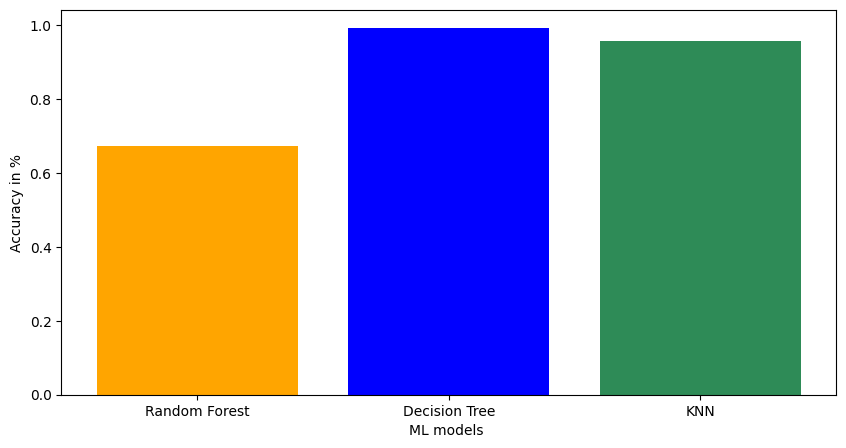

In [47]:
Algorithms = ['Random Forest','Decision Tree','KNN']
Accuracy = [max(a),max(b),max(c)]
x_pos= np.arange(len(Accuracy))
plt.bar(x_pos,Accuracy,color=['Orange','Blue','SeaGreen'])
plt.xticks(x_pos,Algorithms)
plt.ylabel('Accuracy in %')
plt.xlabel('ML models ')